In [1]:
import pandas as pd
import boto3
import io
import numpy
import time
import sagemaker
from sagemaker.amazon.amazon_estimator import get_image_uri
from sagemaker import get_execution_role
from time import gmtime, strftime
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
ml_data_bucket = "adp-ml-datasets"
metadata = "visual-attribution/metadata.csv"

In [3]:
def read_object(key, bucket=ml_data_bucket):
    s3_client = boto3.client('s3')
    response = s3_client.get_object(Bucket=bucket,Key=key)
    file = response["Body"]
    return io.BytesIO(file.read())

In [4]:
df = pd.read_csv(read_object(metadata))

In [5]:
df.head()

,brand,product,image_path,length,neckline,dress_types,color,material,occasion,theme
0,NIC+ZOE,fa6f6be1c785d4d119546c04,images/fa6f6be1c785d4d119546c04/1.jpg,long,NaN,wrap,brown,polyester,casual,NaN
1,NIC+ZOE,fa6f6be1c785d4d119546c04,images/fa6f6be1c785d4d119546c04/2.jpg,long,NaN,wrap,brown,polyester,casual,NaN
2,NIC+ZOE,fa6f6be1c785d4d119546c04,images/fa6f6be1c785d4d119546c04/3.jpg,long,NaN,wrap,brown,polyester,casual,NaN
3,NIC+ZOE,fa6f6be1c785d4d119546c04,images/fa6f6be1c785d4d119546c04/4.jpg,long,NaN,wrap,brown,polyester,casual,NaN
4,Jen's Pirate Booty,c99099289999a2f05db614e3,images/c99099289999a2f05db614e3/1.jpg,long,v-neck,maxi,brown,cotton,casual,NaN


In [6]:
data = df.drop(['brand'], axis = 1)

In [7]:
data.head()

,product,image_path,length,neckline,dress_types,color,material,occasion,theme
0,fa6f6be1c785d4d119546c04,images/fa6f6be1c785d4d119546c04/1.jpg,long,NaN,wrap,brown,polyester,casual,NaN
1,fa6f6be1c785d4d119546c04,images/fa6f6be1c785d4d119546c04/2.jpg,long,NaN,wrap,brown,polyester,casual,NaN
2,fa6f6be1c785d4d119546c04,images/fa6f6be1c785d4d119546c04/3.jpg,long,NaN,wrap,brown,polyester,casual,NaN
3,fa6f6be1c785d4d119546c04,images/fa6f6be1c785d4d119546c04/4.jpg,long,NaN,wrap,brown,polyester,casual,NaN
4,c99099289999a2f05db614e3,images/c99099289999a2f05db614e3/1.jpg,long,v-neck,maxi,brown,cotton,casual,NaN


In [8]:
origin_img = Image.open(read_object('visual-attribution/' + data.image_path[0]))

In [9]:
origin_img.size

(800, 800)

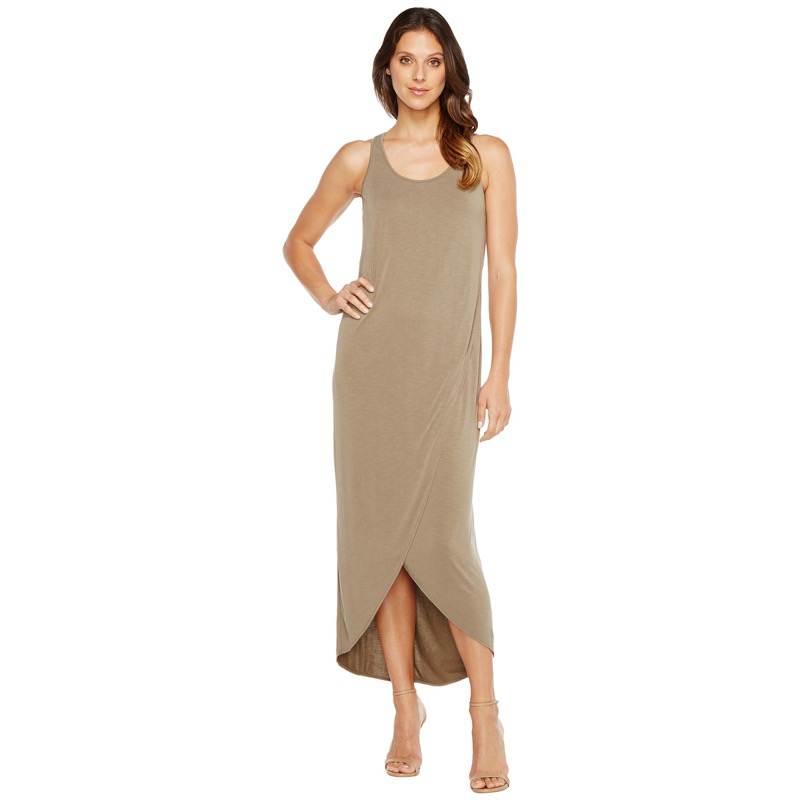

In [10]:
origin_img

In [11]:
img = origin_img.resize((300,300))

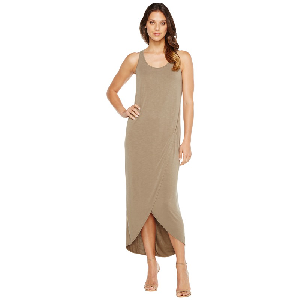

In [12]:
img

In [13]:
np_im = numpy.array(img)
print(np_im.shape)

(300, 300, 3)


Length: long
Neckline: nan
Dress type: wrap
Color: brown
Material: polyester
Occasion: casual
Theme: nan


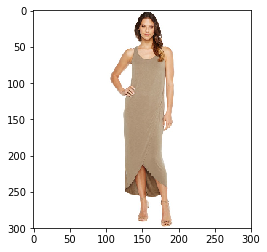

Length: long
Neckline: nan
Dress type: wrap
Color: brown
Material: polyester
Occasion: casual
Theme: nan


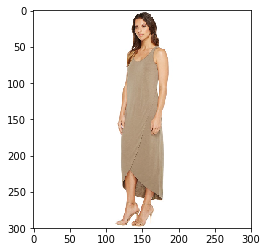

Length: long
Neckline: nan
Dress type: wrap
Color: brown
Material: polyester
Occasion: casual
Theme: nan


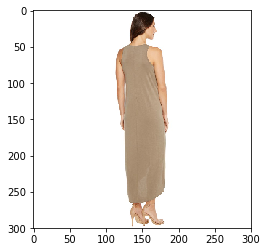

Length: long
Neckline: nan
Dress type: wrap
Color: brown
Material: polyester
Occasion: casual
Theme: nan


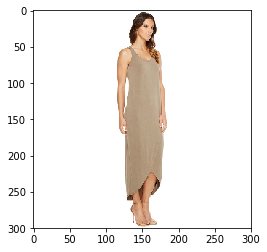

Length: long
Neckline: v-neck
Dress type: maxi
Color: brown
Material: cotton
Occasion: casual
Theme: nan


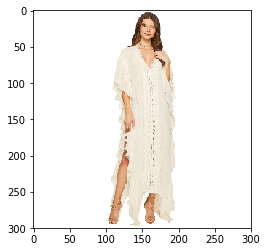

Length: long
Neckline: v-neck
Dress type: maxi
Color: brown
Material: cotton
Occasion: casual
Theme: nan


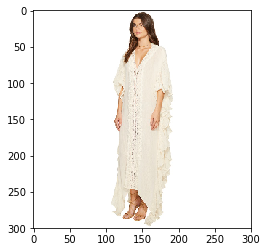

Length: long
Neckline: v-neck
Dress type: maxi
Color: brown
Material: cotton
Occasion: casual
Theme: nan


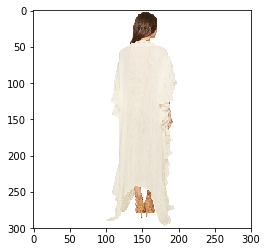

Length: long
Neckline: v-neck
Dress type: maxi
Color: brown
Material: cotton
Occasion: casual
Theme: nan


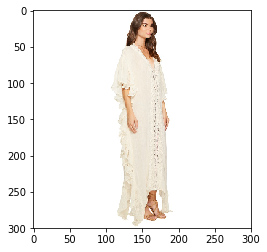

Length: knee length
Neckline: nan
Dress type: high waist
Color: brown
Material: polyester
Occasion: nan
Theme: nan


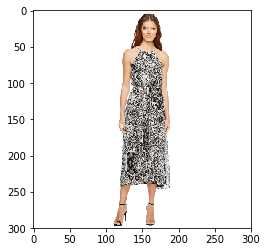

Length: knee length
Neckline: nan
Dress type: high waist
Color: brown
Material: polyester
Occasion: nan
Theme: nan


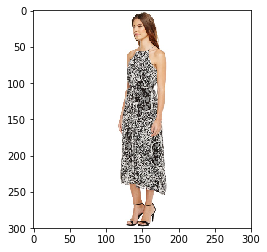

In [14]:
for i in range(0, 10):
    img_path = data.image_path[i]
    img_reshape = Image.open(read_object('visual-attribution/' + img_path)).resize((300,300))
    imgplot = plt.imshow(img_reshape)
    #print('Id: {}'.format(data.product[i]))
    print('Length: {}'.format(data.length[i]))
    print('Neckline: {}'.format(data.neckline[i]))
    print('Dress type: {}'.format(data.dress_types[i]))
    print('Color: {}'.format(data.color[i]))
    print('Material: {}'.format(data.material[i]))
    print('Occasion: {}'.format(data.occasion[i]))
    print('Theme: {}'.format(data.theme[i]))
    plt.show()

# Prepare datasets

In [15]:
data.head()

,product,image_path,length,neckline,dress_types,color,material,occasion,theme
0,fa6f6be1c785d4d119546c04,images/fa6f6be1c785d4d119546c04/1.jpg,long,NaN,wrap,brown,polyester,casual,NaN
1,fa6f6be1c785d4d119546c04,images/fa6f6be1c785d4d119546c04/2.jpg,long,NaN,wrap,brown,polyester,casual,NaN
2,fa6f6be1c785d4d119546c04,images/fa6f6be1c785d4d119546c04/3.jpg,long,NaN,wrap,brown,polyester,casual,NaN
3,fa6f6be1c785d4d119546c04,images/fa6f6be1c785d4d119546c04/4.jpg,long,NaN,wrap,brown,polyester,casual,NaN
4,c99099289999a2f05db614e3,images/c99099289999a2f05db614e3/1.jpg,long,v-neck,maxi,brown,cotton,casual,NaN


In [16]:
data = data.drop(['neckline', 'occasion', 'theme'], axis=1)

In [17]:
data.head()

,product,image_path,length,dress_types,color,material
0,fa6f6be1c785d4d119546c04,images/fa6f6be1c785d4d119546c04/1.jpg,long,wrap,brown,polyester
1,fa6f6be1c785d4d119546c04,images/fa6f6be1c785d4d119546c04/2.jpg,long,wrap,brown,polyester
2,fa6f6be1c785d4d119546c04,images/fa6f6be1c785d4d119546c04/3.jpg,long,wrap,brown,polyester
3,fa6f6be1c785d4d119546c04,images/fa6f6be1c785d4d119546c04/4.jpg,long,wrap,brown,polyester
4,c99099289999a2f05db614e3,images/c99099289999a2f05db614e3/1.jpg,long,maxi,brown,cotton


In [18]:
data = data[data['length'].notnull()]
data = data[data['dress_types'].notnull()]
data = data[data['color'].notnull()]
data = data[data['material'].notnull()]

In [19]:
data.head()

,product,image_path,length,dress_types,color,material
0,fa6f6be1c785d4d119546c04,images/fa6f6be1c785d4d119546c04/1.jpg,long,wrap,brown,polyester
1,fa6f6be1c785d4d119546c04,images/fa6f6be1c785d4d119546c04/2.jpg,long,wrap,brown,polyester
2,fa6f6be1c785d4d119546c04,images/fa6f6be1c785d4d119546c04/3.jpg,long,wrap,brown,polyester
3,fa6f6be1c785d4d119546c04,images/fa6f6be1c785d4d119546c04/4.jpg,long,wrap,brown,polyester
4,c99099289999a2f05db614e3,images/c99099289999a2f05db614e3/1.jpg,long,maxi,brown,cotton


In [20]:
data.shape

(20456, 6)

# Data encoding

In [21]:
from sklearn.preprocessing import LabelEncoder


def encode_data(data_frame, target_attr):
    encoder = LabelEncoder()
    encoder.fit(data_frame[target_attr])

    encode_row = lambda x: encoder.transform(x) if x.name == target_attr else x
    data_frame = data_frame.apply(encode_row)

    return data_frame, encoder.classes_.tolist()

In [22]:
tmp_df = data

In [23]:
tmp_df, encoding_length_dict = encode_data(tmp_df,'length')

In [24]:
tmp_df, encoding_dress_types_dict = encode_data(tmp_df,'dress_types')

In [25]:
tmp_df, encoding_color_dict = encode_data(tmp_df,'color')

In [26]:
tmp_df, encoding_material_dict = encode_data(tmp_df,'material')

In [27]:
prepared_df = tmp_df

In [28]:
prepared_df.head()

,product,image_path,length,dress_types,color,material
0,fa6f6be1c785d4d119546c04,images/fa6f6be1c785d4d119546c04/1.jpg,2,10,2,6
1,fa6f6be1c785d4d119546c04,images/fa6f6be1c785d4d119546c04/2.jpg,2,10,2,6
2,fa6f6be1c785d4d119546c04,images/fa6f6be1c785d4d119546c04/3.jpg,2,10,2,6
3,fa6f6be1c785d4d119546c04,images/fa6f6be1c785d4d119546c04/4.jpg,2,10,2,6
4,c99099289999a2f05db614e3,images/c99099289999a2f05db614e3/1.jpg,2,5,2,0


In [29]:
target_attributes = ['length','dress_types','color','material']

In [30]:
dict = {'length': encoding_length_dict,
       'dress_types': encoding_dress_types_dict,
       'color': encoding_color_dict,
       'material': encoding_material_dict}

In [31]:
for attr in target_attributes:
    print('Encoding {}:\n {}\n'.format(attr, dict[attr]))

Encoding length:
 ['high low', 'knee length', 'long', 'short']

Encoding dress_types:
 ['a-line', 'fit & flare', 'gown', 'halter', 'high waist', 'maxi', 'sheath', 'shift', 'tank', 'tunic', 'wrap']

Encoding color:
 ['black', 'blue', 'brown', 'gold', 'gray', 'green', 'khaki', 'multi', 'navy', 'olive', 'orange', 'pink', 'red', 'silver', 'white', 'yellow']

Encoding material:
 ['cotton', 'elastan', 'jersey', 'lace', 'modal', 'nylon', 'polyester', 'rayon', 'spandex', 'viscose']



# Prepare ML manifest
<a href="https://docs.aws.amazon.com/sagemaker/latest/dg/image-classification.html">AWS Documents</a>

In [32]:
prepared_df['source-ref'] = prepared_df.image_path.apply(lambda x:'s3://{}/visual-attribution/{}'.format(ml_data_bucket,x))

In [33]:
prepared_df.head()

,product,image_path,length,dress_types,color,material,source-ref
0,fa6f6be1c785d4d119546c04,images/fa6f6be1c785d4d119546c04/1.jpg,2,10,2,6,s3://adp-ml-datasets/visual-attribution/images...
1,fa6f6be1c785d4d119546c04,images/fa6f6be1c785d4d119546c04/2.jpg,2,10,2,6,s3://adp-ml-datasets/visual-attribution/images...
2,fa6f6be1c785d4d119546c04,images/fa6f6be1c785d4d119546c04/3.jpg,2,10,2,6,s3://adp-ml-datasets/visual-attribution/images...
3,fa6f6be1c785d4d119546c04,images/fa6f6be1c785d4d119546c04/4.jpg,2,10,2,6,s3://adp-ml-datasets/visual-attribution/images...
4,c99099289999a2f05db614e3,images/c99099289999a2f05db614e3/1.jpg,2,5,2,0,s3://adp-ml-datasets/visual-attribution/images...


In [34]:
from sklearn.model_selection import train_test_split
train_df, validate_df = train_test_split(prepared_df, test_size=0.25)

In [35]:
train_df.head()

,product,image_path,length,dress_types,color,material,source-ref
950,6f6a123af3b11a4b0f1f0b03,images/6f6a123af3b11a4b0f1f0b03/2.jpg,1,0,0,8,s3://adp-ml-datasets/visual-attribution/images...
12461,2d0ba817fb03373bffd9fc19,images/2d0ba817fb03373bffd9fc19/4.jpg,1,1,7,7,s3://adp-ml-datasets/visual-attribution/images...
20876,c3ae60e2180d057d2a3e0192,images/c3ae60e2180d057d2a3e0192/2.jpg,3,0,14,8,s3://adp-ml-datasets/visual-attribution/images...
14693,7d0de5cd935aca6410bc65ac,images/7d0de5cd935aca6410bc65ac/4.jpg,3,9,8,7,s3://adp-ml-datasets/visual-attribution/images...
20371,6c2830f2e71e18450935e9b1,images/6c2830f2e71e18450935e9b1/3.jpg,3,7,14,8,s3://adp-ml-datasets/visual-attribution/images...


In [36]:
validate_df.head()

,product,image_path,length,dress_types,color,material,source-ref
6972,de6dd5624b1211a9046ee71e,images/de6dd5624b1211a9046ee71e/3.jpg,3,7,1,7,s3://adp-ml-datasets/visual-attribution/images...
4200,1a90504170cdf2f51e244b2b,images/1a90504170cdf2f51e244b2b/2.jpg,2,4,0,8,s3://adp-ml-datasets/visual-attribution/images...
4117,4d9b7912fa9ade296766a2ad,images/4d9b7912fa9ade296766a2ad/3.jpg,3,6,0,8,s3://adp-ml-datasets/visual-attribution/images...
19417,5ac7c2340e55b63f27be0053,images/5ac7c2340e55b63f27be0053/2.jpg,3,7,14,8,s3://adp-ml-datasets/visual-attribution/images...
14342,b1e9a6152fb2388aff7a947f,images/b1e9a6152fb2388aff7a947f/4.jpg,3,6,7,6,s3://adp-ml-datasets/visual-attribution/images...


In [37]:
from io import StringIO
import boto3

def saveDFasJsonToS3(df, key):
    buffer = StringIO()
    df.to_json(buffer, orient='records', lines=True)
    s3_resource = boto3.resource('s3')
    s3_resource.Object(ml_data_bucket, key).put(Body=buffer.getvalue())

In [38]:
target_columns = ['source-ref', 'length','dress_types','color','material']

In [39]:
target_train_df = train_df[target_columns]
target_validation_df = validate_df[target_columns]

In [40]:
target_train_df.head()

,source-ref,length,dress_types,color,material
950,s3://adp-ml-datasets/visual-attribution/images...,1,0,0,8
12461,s3://adp-ml-datasets/visual-attribution/images...,1,1,7,7
20876,s3://adp-ml-datasets/visual-attribution/images...,3,0,14,8
14693,s3://adp-ml-datasets/visual-attribution/images...,3,9,8,7
20371,s3://adp-ml-datasets/visual-attribution/images...,3,7,14,8


In [41]:
target_validation_df.head()

,source-ref,length,dress_types,color,material
6972,s3://adp-ml-datasets/visual-attribution/images...,3,7,1,7
4200,s3://adp-ml-datasets/visual-attribution/images...,2,4,0,8
4117,s3://adp-ml-datasets/visual-attribution/images...,3,6,0,8
19417,s3://adp-ml-datasets/visual-attribution/images...,3,7,14,8
14342,s3://adp-ml-datasets/visual-attribution/images...,3,6,7,6


In [42]:
train_key = 'visual-attribution/train-manifest.json'
validation_key = 'visual-attribution/validation-manifest.json'
saveDFasJsonToS3(target_train_df, train_key)
saveDFasJsonToS3(target_validation_df, validation_key)

In [43]:
print('1) Length')
print('num_training_samples = {}'.format(target_train_df.shape[0]))
print('num_classes = {}'.format(len(encoding_length_dict)))
print('\n')
print('2) Dress type')
print('num_training_samples = {}'.format(target_train_df.shape[0]))
print('num_classes = {}'.format(len(encoding_dress_types_dict)))
print('\n')
print('3) Color')
print('num_training_samples = {}'.format(target_train_df.shape[0]))
print('num_classes = {}'.format(len(encoding_color_dict)))
print('\n')
print('4) Material')
print('num_training_samples = {}'.format(target_train_df.shape[0]))
print('num_classes = {}'.format(len(encoding_material_dict)))

1) Length
num_training_samples = 15342
num_classes = 4


2) Dress type
num_training_samples = 15342
num_classes = 11


3) Color
num_training_samples = 15342
num_classes = 16


4) Material
num_training_samples = 15342
num_classes = 10


# Training
Run the training using Amazon sagemaker CreateTrainingJob API

In [59]:
s3_train_manifest = 's3://adp-ml-datasets/visual-attribution/train-manifest.json'
s3_validation_manifest = 's3://adp-ml-datasets/visual-attribution/validation-manifest.json'
output_model_path = 's3://adp-ml-models/visual-attribution/{}/model'

In [60]:
def create_job_name(target_field):
    return 'visual-attributes-{}-train-job-{}'.format(target_field, 
                                                    time.strftime('%Y-%m-%d-%H%M%S', time.gmtime())).replace('_','-')

In [61]:
num_training_samples = target_train_df.shape[0]

In [62]:
#Hyper Parameters
def create_hyper_params(encoding_dict, num_training_samples):
    return {
        'beta_1': '0.9',
        'beta_2': '0.999',
        'checkpoint_frequency': '1',
        'early_stopping': 'false',
        'epochs': '25',
        'eps': '1e-8',
        'gamma': '0.9',
        'image_shape': '3,800,800',
        'learning_rate': '0.001',
        'lr_scheduler_factor': '0.1',
        'mini_batch_size': '12',
        'momentum': '0.9',
        'multi_label': '0',
        'num_classes': str(len(encoding_dict)),
        'num_layers': '34',
        'num_training_samples': str(num_training_samples),
        'optimizer': 'adam',
        'precision_dtype': 'float32',
        'use_pretrained_model': '1',
        'use_weighted_loss': '0',
        'weight_decay': '0.0001'
    }

In [63]:
def create_training_params(target_field, job_name, s3_train_manifest, s3_validation_manifest,
                           hyper_params, output_model_path):
    training_image = get_image_uri(boto3.Session().region_name, 'image-classification')
    role = get_execution_role()
    return \
{
    # specify the training docker image
    "AlgorithmSpecification": {
        "TrainingImage": training_image,
        "TrainingInputMode": "Pipe"
    },
    "RoleArn": role,
    "OutputDataConfig": {
        "S3OutputPath": output_model_path
    },
    "ResourceConfig": {
        "InstanceCount": 1,
        "InstanceType": "ml.p2.xlarge",
        "VolumeSizeInGB": 64
    },
    "TrainingJobName": job_name,
    "HyperParameters": {
        "beta_1": hyper_params['beta_1'],
        "beta_2": hyper_params['beta_2'],
        "checkpoint_frequency": hyper_params['checkpoint_frequency'],
        "early_stopping": hyper_params['early_stopping'],
        "epochs": hyper_params['epochs'],
        "eps": hyper_params['eps'],
        "gamma": hyper_params['gamma'],
        "image_shape": hyper_params['image_shape'],
        "learning_rate": hyper_params['learning_rate'],
        "lr_scheduler_factor": hyper_params['lr_scheduler_factor'],
        "mini_batch_size": hyper_params['mini_batch_size'],
        "momentum": hyper_params['momentum'],
        "multi_label": hyper_params['multi_label'],
        "num_classes": hyper_params['num_classes'],
        "num_layers": hyper_params['num_layers'],
        "num_training_samples": hyper_params['num_training_samples'],
        "optimizer": hyper_params['optimizer'],
        "precision_dtype": hyper_params['precision_dtype'],
        "use_pretrained_model": hyper_params['use_pretrained_model'],
        "use_weighted_loss": hyper_params['use_weighted_loss'],
        "weight_decay": hyper_params['weight_decay'],
        
    },
    "StoppingCondition": {
        "MaxRuntimeInSeconds": 172800
    },
    "InputDataConfig": [
        {
            "ChannelName": "train",
            "DataSource": {
                "S3DataSource": {
                    "S3DataType": "AugmentedManifestFile",
                    "AttributeNames": ['source-ref',target_field],
                    "S3Uri": s3_train_manifest,
                    "S3DataDistributionType": "FullyReplicated"
                }
            },
            "InputMode": "Pipe",
            "ContentType": "application/x-image",
            "CompressionType": "None",
            "RecordWrapperType": "RecordIO"
        },
        {
            "ChannelName": "validation",
            "DataSource": {
                "S3DataSource": {
                    "S3DataType": "AugmentedManifestFile",
                    "AttributeNames": ['source-ref',target_field],
                    "S3Uri": s3_validation_manifest,
                    "S3DataDistributionType": "FullyReplicated"
                }
            },
            "InputMode": "Pipe",
            "ContentType": "application/x-image",
            "CompressionType": "None",
            "RecordWrapperType": "RecordIO"
        }
    ]
}

In [64]:
config = {}
for attr in target_attributes:
    config[attr] = {}
    config[attr]['encoder'] = dict[attr]
    config[attr]['job_name'] = create_job_name(attr)
    config[attr]['hyper_params'] = create_hyper_params(config[attr]['encoder'], num_training_samples)
    config[attr]['output_model_path'] = output_model_path.format(attr)
    config[attr]['training_params'] = create_training_params(attr, 
                                                             config[attr]['job_name'],
                                                             s3_train_manifest, s3_validation_manifest,
                                                             config[attr]['hyper_params'], 
                                                             config[attr]['output_model_path'])
    
#print('Configuration:\n {}'.format(json.dumps(config, indent=2)))

In [65]:
for attr in target_attributes:
    print('Training job for {} with name: {}'.format(attr, config[attr]['job_name']))

Training job for length with name: visual-attributes-length-train-job-2020-04-11-171718
Training job for dress_types with name: visual-attributes-dress-types-train-job-2020-04-11-171718
Training job for color with name: visual-attributes-color-train-job-2020-04-11-171718
Training job for material with name: visual-attributes-material-train-job-2020-04-11-171718


In [66]:
def start_training_job(sagemaker, target_field, job_name, training_params):
    # create the Amazon SageMaker training job
    sagemaker.create_training_job(**training_params)
    # confirm that the training job has started
    status = sagemaker.describe_training_job(TrainingJobName=job_name)['TrainingJobStatus']
    print('Training job[{}] started with current status: {}'.format(target_field, status))

In [67]:
def wait_training_job(sagemaker, target_field, job_name):
    try:
        # wait for the job to finish and report the ending status
        sagemaker.get_waiter('training_job_completed_or_stopped').wait(TrainingJobName=job_name)
        training_info = sagemaker.describe_training_job(TrainingJobName=job_name)
        status = training_info['TrainingJobStatus']
        print("Training job[{}] ended with status: {}".format(target_field, status))
    except:
        print('Training job[{}] failed to start'.format(target_field))
         # if exception is raised, that means it has failed
        message = sagemaker.describe_training_job(TrainingJobName=job_name)['FailureReason']
        print('Training job[{}] failed with the following error: {}'.format(target_field, message))

In [68]:
sagemaker = boto3.client(service_name='sagemaker')

In [69]:
# Run train jobs for length
attr = 'length'
start_training_job(sagemaker, attr, config[attr]['job_name'], config[attr]['training_params'])
#wait_training_job(sagemaker, attr, config[attr]['job_name'])

Training job[length] started with current status: InProgress


In [70]:
# Run train jobs for color
attr = 'color'
start_training_job(sagemaker, attr, config[attr]['job_name'], config[attr]['training_params'])
#wait_training_job(sagemaker, attr, config[attr]['job_name'])

Training job[color] started with current status: InProgress


In [71]:
# Run train jobs for dress_types
attr = 'dress_types'
start_training_job(sagemaker, attr, config[attr]['job_name'], config[attr]['training_params'])
#wait_training_job(sagemaker, attr, config[attr]['job_name'])

Training job[dress_types] started with current status: InProgress


In [72]:
# Run train jobs for material
attr = 'material'
start_training_job(sagemaker, attr, config[attr]['job_name'], config[attr]['training_params'])
#wait_training_job(sagemaker, attr, config[attr]['job_name'])

Training job[material] started with current status: InProgress


In [75]:
for attr in target_attributes:
    status = sagemaker.describe_training_job(TrainingJobName=config[attr]['job_name'])['TrainingJobStatus']
    print("Training job[{}] ended with status: {}".format(attr, status))

Training job[length] ended with status: Completed
Training job[dress_types] ended with status: Completed
Training job[color] ended with status: Completed
Training job[material] ended with status: Completed


# Create Model
We now create a SageMaker Model from the training output. Using the model we can create a Batch Transform Job or an Endpoint Configuration.

In [76]:
def create_model(sage, target_field, job_name): 
    role = get_execution_role()
    model_name="visual-attributes-{}-model-{}".format(target_field, time.strftime('%Y-%m-%d-%H%M%S', time.gmtime())).replace('_','-')
    print('Model name: ' + model_name)
    info = sage.describe_training_job(TrainingJobName=job_name)
    model_data = info['ModelArtifacts']['S3ModelArtifacts']
    print(model_data)

    hosting_image = get_image_uri(boto3.Session().region_name, 'image-classification')

    primary_container = {
        'Image': hosting_image,
        'ModelDataUrl': model_data,
    }

    create_model_response = sage.create_model(ModelName = model_name,
                                              ExecutionRoleArn = role,
                                              PrimaryContainer = primary_container)
    print(create_model_response['ModelArn'])
    return model_name

In [77]:
for attr in target_attributes:
    model_name = create_model(sagemaker, attr, config[attr]['job_name'])
    config[attr]['model_name'] = model_name

Model name: visual-attributes-length-model-2020-04-15-073912
s3://adp-ml-models/visual-attribution/length/model/visual-attributes-length-train-job-2020-04-11-171718/output/model.tar.gz
arn:aws:sagemaker:us-east-1:592068120969:model/visual-attributes-length-model-2020-04-15-073912
Model name: visual-attributes-dress-types-model-2020-04-15-073912
s3://adp-ml-models/visual-attribution/dress_types/model/visual-attributes-dress-types-train-job-2020-04-11-171718/output/model.tar.gz
arn:aws:sagemaker:us-east-1:592068120969:model/visual-attributes-dress-types-model-2020-04-15-073912
Model name: visual-attributes-color-model-2020-04-15-073914
s3://adp-ml-models/visual-attribution/color/model/visual-attributes-color-train-job-2020-04-11-171718/output/model.tar.gz
arn:aws:sagemaker:us-east-1:592068120969:model/visual-attributes-color-model-2020-04-15-073914
Model name: visual-attributes-material-model-2020-04-15-073916
s3://adp-ml-models/visual-attribution/material/model/visual-attributes-materia

# Batch transform
We now create a SageMaker Batch Transform job using the model created above to perform batch prediction.

In [81]:
target_field = 'color'
batch_job_name = "visual-attributes-{}-transform-job-{}".format(target_field, time.strftime('%Y-%m-%d-%H%M%S', time.gmtime()))
stage_bucket = 'adp-ml-stage'
batch_input = 's3://{}/visual-attribution/input/'.format(stage_bucket)
batch_output = 's3://{}/{}/output'.format(stage_bucket, batch_job_name)

In [82]:
request = \
{
    "TransformJobName": batch_job_name,
    "ModelName": model_name,
    "MaxConcurrentTransforms": 16,
    "MaxPayloadInMB": 6,
    "BatchStrategy": "SingleRecord",
    "TransformOutput": {
        "S3OutputPath": batch_output
    },
    "TransformInput": {
        "DataSource": {
            "S3DataSource": {
                "S3DataType": "S3Prefix",
                "S3Uri": batch_input
            }
        },
        "ContentType": "application/x-image",
        "SplitType": "None",
        "CompressionType": "None"
    },
    "TransformResources": {
            "InstanceType": "ml.p2.xlarge",
            "InstanceCount": 1
    }
}

print('Transform job name: {}'.format(batch_job_name))

Transform job name: visual-attributes-color-transform-job-2020-04-15-074059


In [83]:
sagemaker = boto3.client('sagemaker')
sagemaker.create_transform_job(**request)

print("Created Transform job[{}] with name: {}".format(target_field, batch_job_name))

while(True):
    response = sagemaker.describe_transform_job(TransformJobName=batch_job_name)
    status = response['TransformJobStatus']
    if status == 'Completed':
        print("Transform job[{}] ended with status: {}".format(target_field, status))
        break
    if status == 'Failed':
        message = response['FailureReason']
        print('Transform job[{}] failed with the following error: {}'.format(target_field, message))
        raise Exception('Transform job failed') 
    time.sleep(30)  

Created Transform job[color] with name: visual-attributes-color-transform-job-2020-04-15-074059
Transform job[color] ended with status: Completed


# Registr endpoint

Create Endpoint Configuration

In [95]:
from time import gmtime, strftime

def create_endpoint_config(sage, target_field, model_name):
    timestamp = time.strftime('%Y-%m-%d-%H%M%S', time.gmtime())
    endpoint_config_name = "visual-attributes-{}-endpoint-job-".format(target_field) + timestamp
    endpoint_config_name = endpoint_config_name.replace('_','-')
    endpoint_config_response = sage.create_endpoint_config(
        EndpointConfigName = endpoint_config_name,
        ProductionVariants=[{
            'InstanceType':'ml.m4.xlarge',
            'InitialInstanceCount':1,
            'ModelName':model_name,
            'VariantName':'AllTraffic'}])

    print('Endpoint configuration name: {}'.format(endpoint_config_name))
    print('Endpoint configuration arn:  {}'.format(endpoint_config_response['EndpointConfigArn']))
    return endpoint_config_name

In [96]:
for attr in target_attributes:
    config[attr]['endpoint_config'] = create_endpoint_config(sagemaker, attr, config[attr]['model_name'])

Endpoint configuration name: visual-attributes-length-endpoint-job-2020-04-15-080306
Endpoint configuration arn:  arn:aws:sagemaker:us-east-1:592068120969:endpoint-config/visual-attributes-length-endpoint-job-2020-04-15-080306
Endpoint configuration name: visual-attributes-dress-types-endpoint-job-2020-04-15-080306
Endpoint configuration arn:  arn:aws:sagemaker:us-east-1:592068120969:endpoint-config/visual-attributes-dress-types-endpoint-job-2020-04-15-080306
Endpoint configuration name: visual-attributes-color-endpoint-job-2020-04-15-080311
Endpoint configuration arn:  arn:aws:sagemaker:us-east-1:592068120969:endpoint-config/visual-attributes-color-endpoint-job-2020-04-15-080311
Endpoint configuration name: visual-attributes-material-endpoint-job-2020-04-15-080311
Endpoint configuration arn:  arn:aws:sagemaker:us-east-1:592068120969:endpoint-config/visual-attributes-material-endpoint-job-2020-04-15-080311


Create Endpoint

In [97]:
import time

def create_endpoint(sage, target_field, endpoint_config_name):
    timestamp = time.strftime('%Y-%m-%d-%H-%M-%S', time.gmtime())
    endpoint_name = "visual-attributes-{}-endpoint-{}".format(target_field, timestamp)
    endpoint_name = endpoint_name.replace('_','-')
    print('Endpoint name: {}'.format(endpoint_name))

    endpoint_params = {
        'EndpointName': endpoint_name,
        'EndpointConfigName': endpoint_config_name,
    }
    endpoint_response = sage.create_endpoint(**endpoint_params)
    print('EndpointArn = {}'.format(endpoint_response['EndpointArn']))
    # get the status of the endpoint
    response = sage.describe_endpoint(EndpointName=endpoint_name)
    status = response['EndpointStatus']
    print('EndpointStatus = {}'.format(status))

    # wait until the status has changed
    sage.get_waiter('endpoint_in_service').wait(EndpointName=endpoint_name)

    # print the status of the endpoint
    endpoint_response = sage.describe_endpoint(EndpointName=endpoint_name)
    status = endpoint_response['EndpointStatus']
    print('Endpoint creation ended with EndpointStatus = {}'.format(status))

    if status != 'InService':
        raise Exception('Endpoint creation failed.')
    return endpoint_name

In [98]:
for attr in target_attributes:
    config[attr]['endpoint_name'] = create_endpoint(sagemaker, attr, config[attr]['endpoint_config'])

Endpoint name: visual-attributes-length-endpoint-2020-04-15-08-03-19
EndpointArn = arn:aws:sagemaker:us-east-1:592068120969:endpoint/visual-attributes-length-endpoint-2020-04-15-08-03-19
EndpointStatus = Creating
Endpoint creation ended with EndpointStatus = InService
Endpoint name: visual-attributes-dress-types-endpoint-2020-04-15-08-11-51
EndpointArn = arn:aws:sagemaker:us-east-1:592068120969:endpoint/visual-attributes-dress-types-endpoint-2020-04-15-08-11-51
EndpointStatus = Creating
Endpoint creation ended with EndpointStatus = InService
Endpoint name: visual-attributes-color-endpoint-2020-04-15-08-21-23
EndpointArn = arn:aws:sagemaker:us-east-1:592068120969:endpoint/visual-attributes-color-endpoint-2020-04-15-08-21-23
EndpointStatus = Creating
Endpoint creation ended with EndpointStatus = InService
Endpoint name: visual-attributes-material-endpoint-2020-04-15-08-29-55
EndpointArn = arn:aws:sagemaker:us-east-1:592068120969:endpoint/visual-attributes-material-endpoint-2020-04-15-08-

In [99]:
for attr in target_attributes:
    print('Endpoint {}: {}'.format(attr, config[attr]['endpoint_name']))

Endpoint length: visual-attributes-length-endpoint-2020-04-15-08-03-19
Endpoint dress_types: visual-attributes-dress-types-endpoint-2020-04-15-08-11-51
Endpoint color: visual-attributes-color-endpoint-2020-04-15-08-21-23
Endpoint material: visual-attributes-material-endpoint-2020-04-15-08-29-55


# Call endpoint

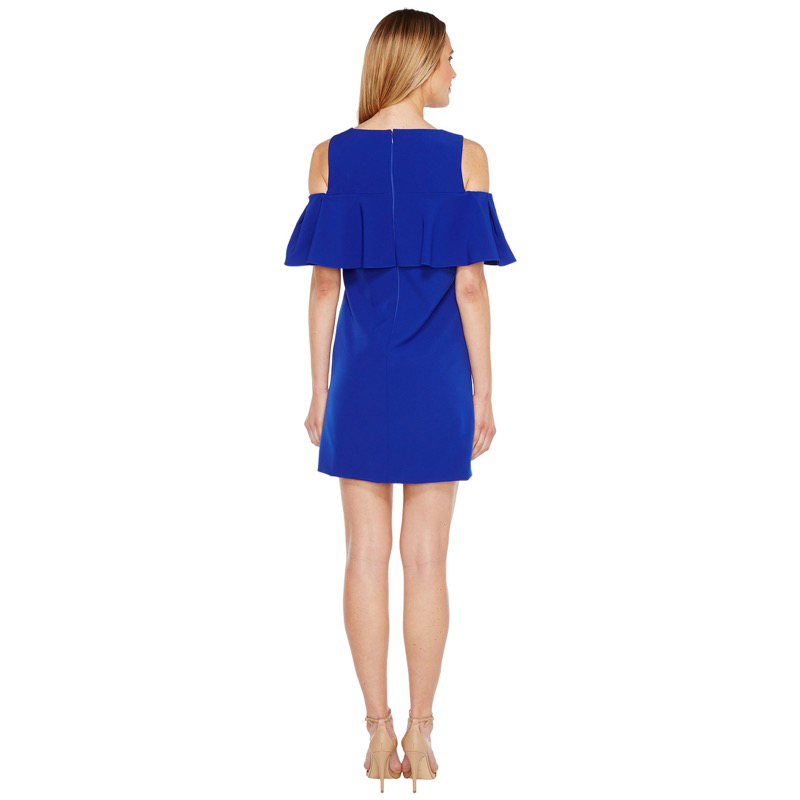

In [108]:
test_img_path = 'visual-attribution/input/test-3.jpg'
test_img = Image.open(read_object(test_img_path, stage_bucket))
test_img

In [109]:
def image_to_byte_array(image:Image):
  io_byte = io.BytesIO()
  image.save(io_byte, format=image.format)
  byte_arr = io_byte.getvalue()
  return byte_arr

In [110]:
target_attribute = 'color'

In [111]:
import json
import numpy as np
import boto3

runtime = boto3.Session().client(service_name='runtime.sagemaker') 
img_to_request = image_to_byte_array(test_img)
response = runtime.invoke_endpoint(EndpointName=config[target_attribute]['endpoint_name'], 
                                   ContentType='application/x-image', 
                                   Body=img_to_request)

In [112]:
result = json.loads(response['Body'].read())

In [113]:
index = np.argmax(result)

In [114]:
encoding_color_dict[index]

'blue'